In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline 
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_error,accuracy_score
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeClassifier 


In [2]:
# !pip install pandas openpyxl

In [3]:
df = pd.read_excel("fitness.xlsx")

In [4]:
df.head()

,User_ID,Full Name,Date,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood
0,1,Sara Martinez,2023-01-01,19,Female,191,80,11405,1862,7.021201,3.440508,80.0,84.0,Yoga,2,Happy
1,1,Sara Martinez,2023-01-02,19,Female,191,80,7010,1806,NaN,3.103590,47.0,72.0,Cardio,9,Neutral
2,1,Sara Martinez,2023-01-03,19,Female,191,80,18942,2274,8.167817,3.814843,46.0,85.0,Yoga,6,Sad
3,1,Sara Martinez,2023-01-04,19,Female,191,80,13778,2656,7.453552,3.508636,105.0,77.0,Yoga,2,Sad
4,1,Sara Martinez,2023-01-05,19,Female,191,80,10247,3571,5.132654,NaN,53.0,61.0,Yoga,8,Sad


In [5]:
data = df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36500 entries, 0 to 36499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   User_ID                36500 non-null  int64         
 1   Full Name              36500 non-null  object        
 2   Date                   36500 non-null  datetime64[ns]
 3   Age                    36500 non-null  int64         
 4   Gender                 36500 non-null  object        
 5   Height (cm)            36500 non-null  int64         
 6   Weight (kg)            36500 non-null  int64         
 7   Steps_Taken            36500 non-null  int64         
 8   Calories_Burned        36500 non-null  int64         
 9   Hours_Slept            32841 non-null  float64       
 10  Water_Intake (Liters)  31099 non-null  float64       
 11  Active_Minutes         34633 non-null  float64       
 12  Heart_Rate (bpm)       34668 non-null  float64       
 13  W

In [7]:
df.shape

(36500, 16)

In [8]:
df.isnull().sum()

User_ID                     0
Full Name                   0
Date                        0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Steps_Taken                 0
Calories_Burned             0
Hours_Slept              3659
Water_Intake (Liters)    5401
Active_Minutes           1867
Heart_Rate (bpm)         1832
Workout_Type             9192
Stress_Level (1-10)         0
Mood                        0
dtype: int64

In [9]:
null_col = ['Hours_Slept','Water_Intake (Liters)','Active_Minutes','Heart_Rate (bpm)','Workout_Type']

In [10]:
nonnulldf = df.drop(columns=null_col)
nonnulldf.shape

(36500, 11)

In [11]:
nulldf = df[null_col]
nulldf.shape

(36500, 5)

In [12]:
nonnulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36500 entries, 0 to 36499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   User_ID              36500 non-null  int64         
 1   Full Name            36500 non-null  object        
 2   Date                 36500 non-null  datetime64[ns]
 3   Age                  36500 non-null  int64         
 4   Gender               36500 non-null  object        
 5   Height (cm)          36500 non-null  int64         
 6   Weight (kg)          36500 non-null  int64         
 7   Steps_Taken          36500 non-null  int64         
 8   Calories_Burned      36500 non-null  int64         
 9   Stress_Level (1-10)  36500 non-null  int64         
 10  Mood                 36500 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 3.1+ MB


In [13]:
nulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36500 entries, 0 to 36499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hours_Slept            32841 non-null  float64
 1   Water_Intake (Liters)  31099 non-null  float64
 2   Active_Minutes         34633 non-null  float64
 3   Heart_Rate (bpm)       34668 non-null  float64
 4   Workout_Type           27308 non-null  object 
dtypes: float64(4), object(1)
memory usage: 1.4+ MB


In [14]:
nulldf.head(3)

,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type
0,7.021201,3.440508,80.0,84.0,Yoga
1,NaN,3.103590,47.0,72.0,Cardio
2,8.167817,3.814843,46.0,85.0,Yoga


In [15]:
nonnulldf.head(368)

,User_ID,Full Name,Date,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Stress_Level (1-10),Mood
0,1,Sara Martinez,2023-01-01,19,Female,191,80,11405,1862,2,Happy
1,1,Sara Martinez,2023-01-02,19,Female,191,80,7010,1806,9,Neutral
2,1,Sara Martinez,2023-01-03,19,Female,191,80,18942,2274,6,Sad
3,1,Sara Martinez,2023-01-04,19,Female,191,80,13778,2656,2,Sad
4,1,Sara Martinez,2023-01-05,19,Female,191,80,10247,3571,8,Sad
...,...,...,...,...,...,...,...,...,...,...,...
363,1,Sara Martinez,2023-12-30,19,Female,191,80,12904,3744,8,Stressed
364,1,Sara Martinez,2023-12-31,19,Female,191,80,14840,3222,1,Neutral
365,2,Robert Brown,2023-01-01,40,Male,196,111,14998,1684,8,Stressed
366,2,Robert Brown,2023-01-02,40,Male,196,111,18060,2426,3,Sad


In [16]:
df[df["User_ID"] == 1]["Mood"].unique()

array(['Happy', 'Neutral', 'Sad', 'Stressed'], dtype=object)

In [17]:
h = [0] * 100
n = [0] * 100
s = [0] * 100
st = [0] * 100 

for i in range(100):
    user_df = df[df["User_ID"] == i]

    for mood in user_df["Mood"]:
        if mood == "Happy":
            h[i] += 1
        elif mood == "Neutral":
            n[i] += 1
        elif mood == "Stressed":
            st[i] += 1
        else:
            s[i] += 1

print("Happy:", h)
print("Neutral:", n)
print("Sad:", s)
print("Stressed",st)

Happy: [0, 91, 92, 81, 88, 81, 94, 90, 76, 88, 91, 82, 94, 104, 68, 95, 94, 93, 99, 98, 96, 85, 90, 96, 93, 89, 93, 91, 97, 90, 97, 95, 71, 79, 86, 86, 94, 90, 85, 91, 92, 95, 97, 87, 92, 105, 96, 93, 74, 88, 105, 101, 101, 82, 82, 91, 81, 92, 84, 89, 90, 84, 103, 91, 97, 90, 95, 76, 108, 97, 100, 90, 91, 100, 86, 102, 94, 93, 102, 86, 94, 89, 88, 93, 80, 82, 86, 78, 99, 103, 91, 68, 92, 97, 92, 81, 92, 85, 89, 92]
Neutral: [0, 99, 76, 97, 92, 94, 79, 81, 84, 94, 88, 96, 91, 92, 103, 84, 93, 96, 99, 79, 101, 85, 82, 81, 92, 88, 79, 92, 71, 85, 86, 92, 109, 99, 88, 108, 86, 96, 93, 91, 87, 90, 91, 89, 98, 91, 78, 95, 96, 97, 88, 84, 80, 80, 97, 82, 97, 94, 98, 95, 84, 89, 91, 104, 96, 92, 93, 91, 90, 95, 82, 98, 83, 73, 97, 71, 107, 100, 69, 96, 113, 97, 89, 98, 92, 91, 86, 96, 76, 102, 94, 110, 89, 84, 96, 87, 92, 89, 106, 98]
Sad: [0, 85, 95, 100, 86, 84, 99, 100, 103, 100, 88, 104, 93, 87, 95, 96, 90, 89, 89, 95, 89, 98, 88, 86, 92, 101, 97, 86, 96, 91, 89, 90, 89, 82, 95, 100, 104, 

In [18]:
mood_counts = (
    df.groupby(["User_ID", "Mood"])
      .size()
      .unstack(fill_value=0)
)

print(mood_counts)

Mood     Happy  Neutral  Sad  Stressed
User_ID                               
1           91       99   85        90
2           92       76   95       102
3           81       97  100        87
4           88       92   86        99
5           81       94   84       106
...        ...      ...  ...       ...
96          92       92  104        77
97          85       89  103        88
98          89      106   84        86
99          92       98   79        96
100         95      101   85        84

[100 rows x 4 columns]


In [19]:
dfmood = df.merge(mood_counts, on="User_ID", how="left")

In [20]:
dfmood

,User_ID,Full Name,Date,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood,Happy,Neutral,Sad,Stressed
0,1,Sara Martinez,2023-01-01,19,Female,191,80,11405,1862,7.021201,3.440508,80.0,84.0,Yoga,2,Happy,91,99,85,90
1,1,Sara Martinez,2023-01-02,19,Female,191,80,7010,1806,NaN,3.103590,47.0,72.0,Cardio,9,Neutral,91,99,85,90
2,1,Sara Martinez,2023-01-03,19,Female,191,80,18942,2274,8.167817,3.814843,46.0,85.0,Yoga,6,Sad,91,99,85,90
3,1,Sara Martinez,2023-01-04,19,Female,191,80,13778,2656,7.453552,3.508636,105.0,77.0,Yoga,2,Sad,91,99,85,90
4,1,Sara Martinez,2023-01-05,19,Female,191,80,10247,3571,5.132654,NaN,53.0,61.0,Yoga,8,Sad,91,99,85,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36495,100,Sara Jones,2023-12-27,54,Male,151,107,10905,3922,NaN,2.781033,61.0,96.0,NaN,3,Sad,95,101,85,84
36496,100,Sara Jones,2023-12-28,54,Male,151,107,2245,3151,7.652822,NaN,93.0,74.0,NaN,10,Happy,95,101,85,84
36497,100,Sara Jones,2023-12-29,54,Male,151,107,11892,2906,7.173268,3.237390,43.0,67.0,Cardio,9,Happy,95,101,85,84
36498,100,Sara Jones,2023-12-30,54,Male,151,107,12967,1863,4.011179,3.650197,85.0,61.0,Yoga,4,Happy,95,101,85,84


In [21]:
df[df["User_ID"] == 1]['Mood'] == "Happy"

0       True
1      False
2      False
3      False
4      False
       ...  
360    False
361     True
362     True
363    False
364    False
Name: Mood, Length: 365, dtype: bool

In [22]:
df['User_ID'].value_counts()

User_ID
1      365
2      365
3      365
4      365
5      365
      ... 
96     365
97     365
98     365
99     365
100    365
Name: count, Length: 100, dtype: int64

In [23]:
365*100

36500

In [24]:
df[null_col]

,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type
0,7.021201,3.440508,80.0,84.0,Yoga
1,NaN,3.103590,47.0,72.0,Cardio
2,8.167817,3.814843,46.0,85.0,Yoga
3,7.453552,3.508636,105.0,77.0,Yoga
4,5.132654,NaN,53.0,61.0,Yoga
...,...,...,...,...,...
36495,NaN,2.781033,61.0,96.0,NaN
36496,7.652822,NaN,93.0,74.0,NaN
36497,7.173268,3.237390,43.0,67.0,Cardio
36498,4.011179,3.650197,85.0,61.0,Yoga


In [25]:
df[null_col]['Hours_Slept']

0        7.021201
1             NaN
2        8.167817
3        7.453552
4        5.132654
           ...   
36495         NaN
36496    7.652822
36497    7.173268
36498    4.011179
36499    6.652888
Name: Hours_Slept, Length: 36500, dtype: float64

In [26]:
df['Hours_Slept'].isnull().sum()

np.int64(3659)

In [27]:
hrmean = df['Hours_Slept'].mean()
hrmed = df['Hours_Slept'].median()
hr = df['Hours_Slept'] 


print("Hour_Slept mean",hrmean)  
print("Hour_Slept median",hrmed) 
print("Hour_Slept",hr) 


print("Hour_Slept mean variance",hrmean.var())  
print("Hour_Slept median variance",hrmed.var()) 
print("Hour_Slept variance",hr.var()) 

Hour_Slept mean 6.492193986204873
Hour_Slept median 6.500790150995588
Hour_Slept 0        7.021201
1             NaN
2        8.167817
3        7.453552
4        5.132654
           ...   
36495         NaN
36496    7.652822
36497    7.173268
36498    4.011179
36499    6.652888
Name: Hours_Slept, Length: 36500, dtype: float64
Hour_Slept mean variance 0.0
Hour_Slept median variance 0.0
Hour_Slept variance 2.066861908657187


In [28]:
df['Hours_Slept_mean'] = df[null_col]['Hours_Slept'].fillna(hrmean)
df['Hours_Slept_median'] = df[null_col]['Hours_Slept'].fillna(hrmed) 
df['Hours_Slept_ffill'] = df[null_col]['Hours_Slept'].fillna(method='ffill') 


print("Hour_Slept mean variance",hrmean.var())  
print("Hour_Slept median variance",hrmed.var()) 
print("Hour_Slept variance",hr.var()) 

Hour_Slept mean variance 0.0
Hour_Slept median variance 0.0
Hour_Slept variance 2.066861908657187


C:\Users\dipan\AppData\Local\Temp\ipykernel_24364\450193984.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Hours_Slept_ffill'] = df[null_col]['Hours_Slept'].fillna(method='ffill')


In [29]:
df['Hours_Slept_median'].isnull().sum()

np.int64(0)

In [30]:
df

,User_ID,Full Name,Date,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood,Hours_Slept_mean,Hours_Slept_median,Hours_Slept_ffill
0,1,Sara Martinez,2023-01-01,19,Female,191,80,11405,1862,7.021201,3.440508,80.0,84.0,Yoga,2,Happy,7.021201,7.021201,7.021201
1,1,Sara Martinez,2023-01-02,19,Female,191,80,7010,1806,NaN,3.103590,47.0,72.0,Cardio,9,Neutral,6.492194,6.500790,7.021201
2,1,Sara Martinez,2023-01-03,19,Female,191,80,18942,2274,8.167817,3.814843,46.0,85.0,Yoga,6,Sad,8.167817,8.167817,8.167817
3,1,Sara Martinez,2023-01-04,19,Female,191,80,13778,2656,7.453552,3.508636,105.0,77.0,Yoga,2,Sad,7.453552,7.453552,7.453552
4,1,Sara Martinez,2023-01-05,19,Female,191,80,10247,3571,5.132654,NaN,53.0,61.0,Yoga,8,Sad,5.132654,5.132654,5.132654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36495,100,Sara Jones,2023-12-27,54,Male,151,107,10905,3922,NaN,2.781033,61.0,96.0,NaN,3,Sad,6.492194,6.500790,4.540873
36496,100,Sara Jones,2023-12-28,54,Male,151,107,2245,3151,7.652822,NaN,93.0,74.0,NaN,10,Happy,7.652822,7.652822,7.652822
36497,100,Sara Jones,2023-12-29,54,Male,151,107,11892,2906,7.173268,3.237390,43.0,67.0,Cardio,9,Happy,7.173268,7.173268,7.173268
36498,100,Sara Jones,2023-12-30,54,Male,151,107,12967,1863,4.011179,3.650197,85.0,61.0,Yoga,4,Happy,4.011179,4.011179,4.011179


<Axes: ylabel='Density'>

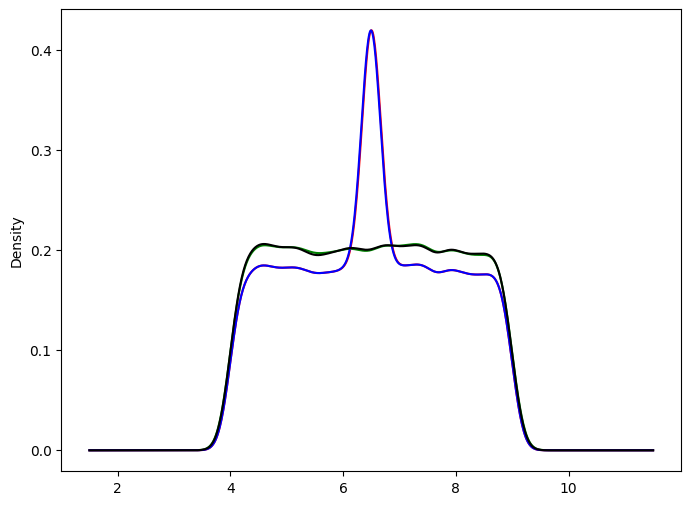

In [31]:
plt.figure(figsize=(8,6)) 
plt.subplot(111) 

df['Hours_Slept'].plot(kind='kde',color='green')
df['Hours_Slept_median'].plot(kind='kde',color='red')
df['Hours_Slept_mean'].plot(kind='kde',color='blue')
df['Hours_Slept_ffill'].plot(kind='kde',color='black')

In [32]:
df['Hours_Slept'] = df["Hours_Slept"].fillna(method='ffill')

C:\Users\dipan\AppData\Local\Temp\ipykernel_24364\147900383.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Hours_Slept'] = df["Hours_Slept"].fillna(method='ffill')


In [33]:
df

,User_ID,Full Name,Date,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood,Hours_Slept_mean,Hours_Slept_median,Hours_Slept_ffill
0,1,Sara Martinez,2023-01-01,19,Female,191,80,11405,1862,7.021201,3.440508,80.0,84.0,Yoga,2,Happy,7.021201,7.021201,7.021201
1,1,Sara Martinez,2023-01-02,19,Female,191,80,7010,1806,7.021201,3.103590,47.0,72.0,Cardio,9,Neutral,6.492194,6.500790,7.021201
2,1,Sara Martinez,2023-01-03,19,Female,191,80,18942,2274,8.167817,3.814843,46.0,85.0,Yoga,6,Sad,8.167817,8.167817,8.167817
3,1,Sara Martinez,2023-01-04,19,Female,191,80,13778,2656,7.453552,3.508636,105.0,77.0,Yoga,2,Sad,7.453552,7.453552,7.453552
4,1,Sara Martinez,2023-01-05,19,Female,191,80,10247,3571,5.132654,NaN,53.0,61.0,Yoga,8,Sad,5.132654,5.132654,5.132654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36495,100,Sara Jones,2023-12-27,54,Male,151,107,10905,3922,4.540873,2.781033,61.0,96.0,NaN,3,Sad,6.492194,6.500790,4.540873
36496,100,Sara Jones,2023-12-28,54,Male,151,107,2245,3151,7.652822,NaN,93.0,74.0,NaN,10,Happy,7.652822,7.652822,7.652822
36497,100,Sara Jones,2023-12-29,54,Male,151,107,11892,2906,7.173268,3.237390,43.0,67.0,Cardio,9,Happy,7.173268,7.173268,7.173268
36498,100,Sara Jones,2023-12-30,54,Male,151,107,12967,1863,4.011179,3.650197,85.0,61.0,Yoga,4,Happy,4.011179,4.011179,4.011179


In [34]:
df["Water_Intake (Liters)"] = (
    df.groupby("User_ID")["Water_Intake (Liters)"]
      .ffill()
)

<Axes: ylabel='Frequency'>

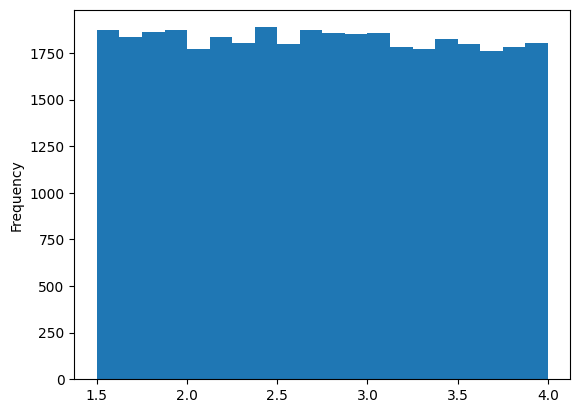

In [35]:
df["Water_Intake (Liters)"].plot(kind="hist", bins=20)

In [36]:
df['avgtime'] = df.groupby('User_ID')['Active_Minutes'].transform('mean')
df['Active_Minutes'] = df['Active_Minutes'].fillna(df['avgtime'])

In [37]:
df['Active_Minutes'].isnull().sum()

np.int64(0)

In [38]:
watermean = df['Water_Intake (Liters)'].mean()

In [39]:
df['Water_Intake (Liters)'] = df['Water_Intake (Liters)'].fillna(watermean)

In [40]:
df['heartavg'] = df.groupby('User_ID')['Heart_Rate (bpm)'].transform('mean')
df['Heart_Rate (bpm)'] = df['Heart_Rate (bpm)'].fillna(df['heartavg'])

In [41]:
workout_mode = df.groupby('User_ID')['Workout_Type'].transform(lambda x : x.fillna(x.mode()[0]))

In [42]:
df['Workout_Type'] = df['Workout_Type'].fillna(workout_mode)

In [43]:
df.head()

,User_ID,Full Name,Date,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,...,Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood,Hours_Slept_mean,Hours_Slept_median,Hours_Slept_ffill,avgtime,heartavg
0,1,Sara Martinez,2023-01-01,19,Female,191,80,11405,1862,7.021201,...,80.0,84.0,Yoga,2,Happy,7.021201,7.021201,7.021201,74.245665,79.338192
1,1,Sara Martinez,2023-01-02,19,Female,191,80,7010,1806,7.021201,...,47.0,72.0,Cardio,9,Neutral,6.492194,6.500790,7.021201,74.245665,79.338192
2,1,Sara Martinez,2023-01-03,19,Female,191,80,18942,2274,8.167817,...,46.0,85.0,Yoga,6,Sad,8.167817,8.167817,8.167817,74.245665,79.338192
3,1,Sara Martinez,2023-01-04,19,Female,191,80,13778,2656,7.453552,...,105.0,77.0,Yoga,2,Sad,7.453552,7.453552,7.453552,74.245665,79.338192
4,1,Sara Martinez,2023-01-05,19,Female,191,80,10247,3571,5.132654,...,53.0,61.0,Yoga,8,Sad,5.132654,5.132654,5.132654,74.245665,79.338192


In [44]:
df.isnull().sum()

User_ID                  0
Full Name                0
Date                     0
Age                      0
Gender                   0
Height (cm)              0
Weight (kg)              0
Steps_Taken              0
Calories_Burned          0
Hours_Slept              0
Water_Intake (Liters)    0
Active_Minutes           0
Heart_Rate (bpm)         0
Workout_Type             0
Stress_Level (1-10)      0
Mood                     0
Hours_Slept_mean         0
Hours_Slept_median       0
Hours_Slept_ffill        0
avgtime                  0
heartavg                 0
dtype: int64

In [45]:
dropcol = ['User_ID',"Full Name","Date",'Hours_Slept_mean','Hours_Slept_median','Hours_Slept_ffill','avgtime','heartavg']

In [82]:
df1 = df.drop(columns=dropcol,inplace=True)

KeyError: "['User_ID', 'Full Name', 'Date', 'Hours_Slept_mean', 'Hours_Slept_median', 'Hours_Slept_ffill', 'avgtime', 'heartavg'] not found in axis"

In [52]:
df['Gender'] = df['Gender'].map({"Female":0,"Male":1,'Other':2})

In [58]:
df['Workout_Type'] = df['Workout_Type'].map({"Yoga":0,"Cardio":1,'Strength':2})

In [63]:
X = df.drop(columns='Mood')
y = df['Mood']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)

<Axes: xlabel='Mood', ylabel='Workout_Type'>

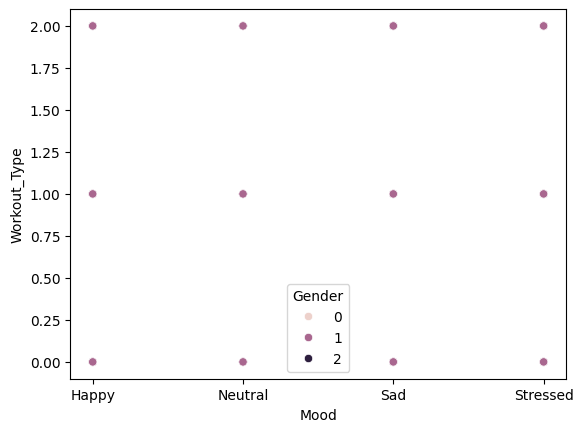

In [69]:
sns.scatterplot(x=df['Mood'],y=df["Workout_Type"],hue=df['Gender'])

In [81]:
df

,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood
0,19,0,191,80,11405,1862,7.021201,3.440508,80.0,84.0,0,2,Happy
1,19,0,191,80,7010,1806,7.021201,3.103590,47.0,72.0,1,9,Neutral
2,19,0,191,80,18942,2274,8.167817,3.814843,46.0,85.0,0,6,Sad
3,19,0,191,80,13778,2656,7.453552,3.508636,105.0,77.0,0,2,Sad
4,19,0,191,80,10247,3571,5.132654,3.508636,53.0,61.0,0,8,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36495,54,1,151,107,10905,3922,4.540873,2.781033,61.0,96.0,0,3,Sad
36496,54,1,151,107,2245,3151,7.652822,2.781033,93.0,74.0,0,10,Happy
36497,54,1,151,107,11892,2906,7.173268,3.237390,43.0,67.0,1,9,Happy
36498,54,1,151,107,12967,1863,4.011179,3.650197,85.0,61.0,0,4,Happy


In [76]:
corr_matrix = df.corr(numeric_only=True)

<Axes: >

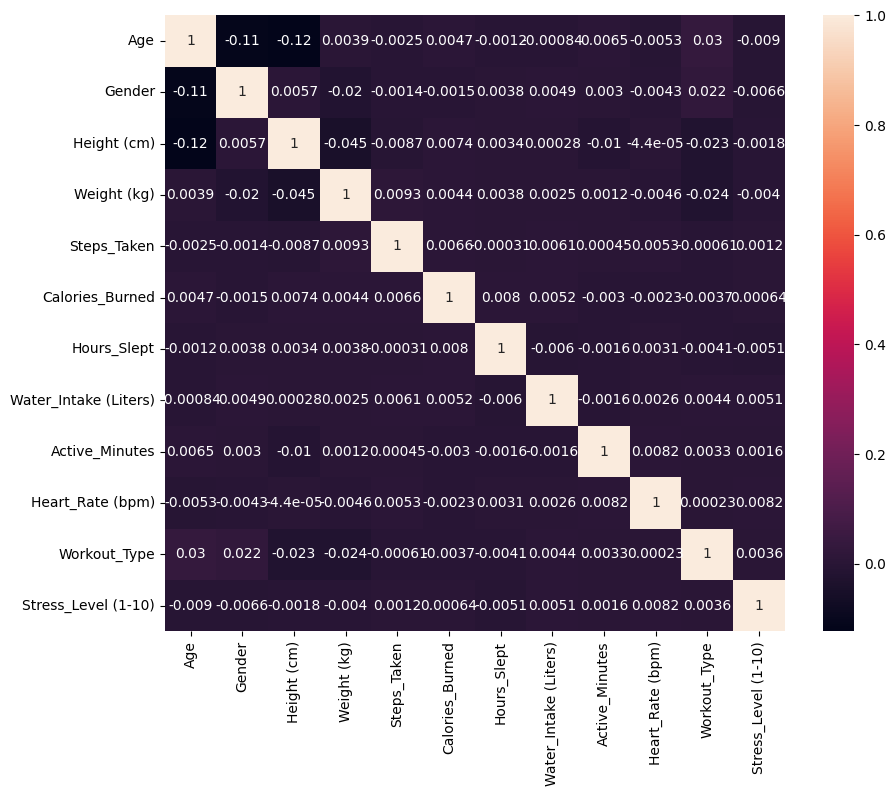

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)